In [1]:
# Imports for image processing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from matplotlib.image import imread

%matplotlib inline

In [2]:
# Checking folders
os.listdir("C:\\Users\\asing\\OneDrive\\Desktop\\Jupyter Notebook\\Udemy\\TF_2_Notebooks_and_Data - Copy\\04-CNNs\\skin_images")

['test', 'train']

In [3]:
# Setting path variables to access files
test_path = "C:\\Users\\asing\\OneDrive\\Desktop\\Jupyter Notebook\\Udemy\\TF_2_Notebooks_and_Data - Copy\\04-CNNs\\skin_images" + "\\test"
train_path = "C:\\Users\\asing\\OneDrive\\Desktop\\Jupyter Notebook\\Udemy\\TF_2_Notebooks_and_Data - Copy\\04-CNNs\\skin_images" + "\\train"

In [4]:
# Checking different types of skin cancers
print(os.listdir(test_path))
print(len(os.listdir(test_path)))

['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Bullous Disease Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Hair Loss Photos Alopecia and other Hair Diseases', 'Healthy', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Nail Fungus and other Nail Disease', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Scabies Lyme Disease and other Infestations and Bites', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections']
24


(472, 720, 3)


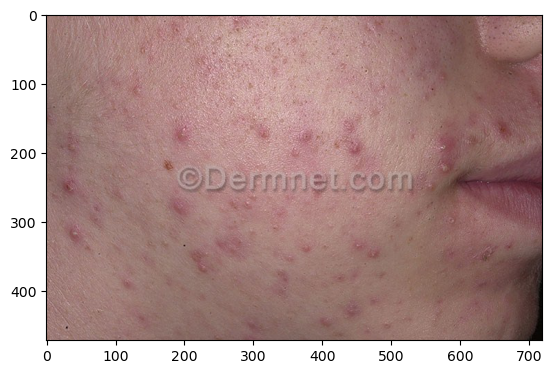

In [5]:
# Show image from acne folder
acne_image = train_path+'\\Acne and Rosacea Photos\\' + os.listdir(train_path+'\\Acne and Rosacea Photos')[0]
plt.imshow(imread(acne_image))
print(imread(acne_image).shape) # Check the color channels for each image

In [6]:
imread(acne_image).max() # Check if values need to be scaled later

255

In [7]:
# Get the shape of all images
width = []
height = []

for folder in os.listdir(test_path):
    
    for image in os.listdir(test_path+'\\'+folder):
        
        img = imread(test_path+'\\'+folder+'\\'+image)
        d1, d2, colors = img.shape
        width.append(d1)
        height.append(d2)

<Axes: >

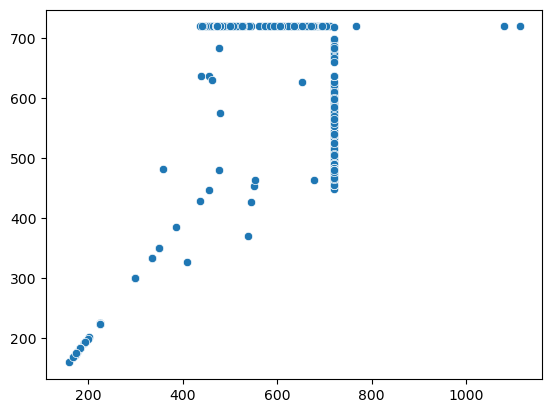

In [8]:
# Display size distribution of images
sns.scatterplot(x=width, y=height)

In [9]:
# Use average width/height to match most of the images but include the outlier data
avg_width = int(np.round(np.average(width)))
avg_height = int(np.round(np.average(height)))
print(avg_width, avg_height)

image_shape = (avg_width, avg_height, 3) # Set the shape of each image, 3 for the rgb color channels

538 647


In [10]:
image_shape = (200, 200, 3)

In [11]:
# import for randomizing images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
# Create an image data generator to increase variability in images for better training
image_gen = ImageDataGenerator(rotation_range=0, width_shift_range=0.05, height_shift_range=0.05,
                              rescale=1/255, horizontal_flip=True, vertical_flip=True, fill_mode='nearest')

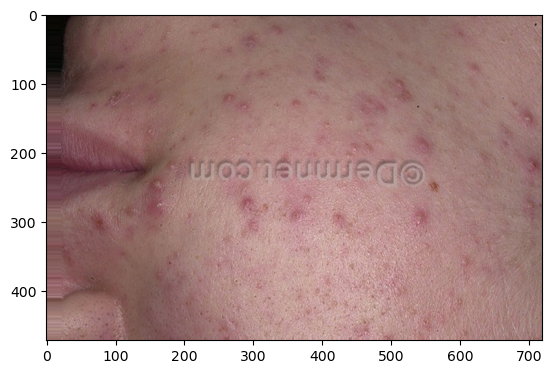

In [13]:
# Check to make sure generator doesn't distort image too much
plt.imshow(image_gen.random_transform(imread(acne_image)))

In [14]:
print(image_gen.flow_from_directory(test_path))
print(image_gen.flow_from_directory(train_path))

Found 4098 images belonging to 24 classes.
Found 16833 images belonging to 24 classes.


In [15]:
# Model Creation Imports
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPool2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import load_model

In [21]:
# Model Creation
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), input_shape=image_shape, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))



model.add(Flatten())



model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(24, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
# Checking the model parameters to make sure it is trainable in reasonable time
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 196, 196, 32)      2432      
                                                                 
 batch_normalization (Batch  (None, 196, 196, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 98, 98, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 96, 96, 64)        256       
 chNormalization)                                                
                                                        

In [18]:
early_stop = EarlyStopping(monitor='val_loss', patience=75)

In [19]:
train_image_gen = image_gen.flow_from_directory(train_path, target_size=image_shape[:2], batch_size=16, 
                                               color_mode='rgb', class_mode='categorical', shuffle=True)
test_image_gen = image_gen.flow_from_directory(test_path, target_size=image_shape[:2], batch_size=16, 
                                               color_mode='rgb', class_mode='categorical', shuffle=False)

Found 16833 images belonging to 24 classes.
Found 4098 images belonging to 24 classes.


In [22]:
model.fit(train_image_gen, epochs=99999, validation_data=test_image_gen, callbacks=[early_stop])

Epoch 1/99999


1053/1053 [==============================] - 371s 350ms/step - loss: 2.9429 - accuracy: 0.1574 - val_loss: 2.8866 - val_accuracy: 0.1525
Epoch 2/99999
1053/1053 [==============================] - 291s 277ms/step - loss: 2.7444 - accuracy: 0.2032 - val_loss: 3.0064 - val_accuracy: 0.1371
Epoch 3/99999
1053/1053 [==============================] - 284s 270ms/step - loss: 2.6673 - accuracy: 0.2256 - val_loss: 3.0207 - val_accuracy: 0.1515
Epoch 4/99999
1053/1053 [==============================] - 297s 282ms/step - loss: 2.5970 - accuracy: 0.2448 - val_loss: 2.7157 - val_accuracy: 0.2030
Epoch 5/99999
1053/1053 [==============================] - 297s 282ms/step - loss: 2.5055 - accuracy: 0.2686 - val_loss: 2.7772 - val_accuracy: 0.1879
Epoch 6/99999
1053/1053 [==============================] - 297s 282ms/step - loss: 2.4366 - accuracy: 0.2840 - val_loss: 2.4837 - val_accuracy: 0.2733
Epoch 7/99999
1053/1053 [==============================] - 277s 263ms/step - loss: 2.3981 - 

Epoch 52/99999
1053/1053 [==============================] - 278s 264ms/step - loss: 1.4379 - accuracy: 0.5582 - val_loss: 2.1564 - val_accuracy: 0.4034
Epoch 53/99999
1053/1053 [==============================] - 277s 263ms/step - loss: 1.4738 - accuracy: 0.5501 - val_loss: 2.1738 - val_accuracy: 0.3946
Epoch 54/99999
1053/1053 [==============================] - 280s 266ms/step - loss: 1.4208 - accuracy: 0.5603 - val_loss: 2.1088 - val_accuracy: 0.4090
Epoch 55/99999
1053/1053 [==============================] - 275s 262ms/step - loss: 1.4046 - accuracy: 0.5661 - val_loss: 2.3127 - val_accuracy: 0.3714
Epoch 56/99999
1053/1053 [==============================] - 278s 264ms/step - loss: 1.3882 - accuracy: 0.5743 - val_loss: 2.3363 - val_accuracy: 0.3734
Epoch 57/99999
1053/1053 [==============================] - 278s 264ms/step - loss: 1.3819 - accuracy: 0.5743 - val_loss: 2.5950 - val_accuracy: 0.3306
Epoch 58/99999
1053/1053 [==============================] - 280s 266ms/step - loss: 1.37

Epoch 106/99999
1053/1053 [==============================] - 279s 265ms/step - loss: 0.9746 - accuracy: 0.6900 - val_loss: 2.1832 - val_accuracy: 0.4512
Epoch 107/99999
1053/1053 [==============================] - 276s 262ms/step - loss: 0.9933 - accuracy: 0.6853 - val_loss: 2.4820 - val_accuracy: 0.3934
Epoch 108/99999
1053/1053 [==============================] - 278s 264ms/step - loss: 0.9820 - accuracy: 0.6888 - val_loss: 2.2682 - val_accuracy: 0.4341
Epoch 109/99999
1053/1053 [==============================] - 276s 263ms/step - loss: 0.9708 - accuracy: 0.6908 - val_loss: 2.3503 - val_accuracy: 0.4231
Epoch 110/99999
1053/1053 [==============================] - 277s 263ms/step - loss: 0.9631 - accuracy: 0.6903 - val_loss: 2.5470 - val_accuracy: 0.3973
Epoch 111/99999
1053/1053 [==============================] - 279s 265ms/step - loss: 0.9718 - accuracy: 0.6889 - val_loss: 2.2775 - val_accuracy: 0.4475
Epoch 112/99999
1053/1053 [==============================] - 278s 264ms/step - los

KeyboardInterrupt: 

In [26]:
model.save('47.02 val accuracy.h5')

C:\Users\asing\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
